RBF KERNAL SVM FOR AMAZON DATASET
====================

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from datetime import datetime

In [ ]:
data = pd.read_csv('final_clean.csv')
data.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...


In [ ]:
final=data.sample(n=50000 ,replace=True,random_state=None, axis=0)
final.shape
#sampling 50k points

(50000, 11)

In [ ]:
X = final['Text']
Y = final['Score']

In [ ]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
#train-test split

TFIDF  featurization for modeling
===

In [ ]:
tf_idf_vect = TfidfVectorizer()
tfidf_train = tf_idf_vect.fit_transform(X_train)
tfidf_test = tf_idf_vect.transform(X_test)

RANDOM SEARCH CV 
---------------

In [ ]:

startTime = datetime.now()

def randomcv(train_feat,test_feat,y_train,y_test):
    parameters = {'C':[10**-4,10**-3,10**-2, 10**0, 10**2,10**-3,10**4],
              'gamma': [10**-4,10**-3,10**-2, 10**0, 10**2,10**-3,10**4]}
    svm = SVC(kernel='rbf')
    svm_rbf_cv= RandomizedSearchCV(svm, param_distributions=parameters, n_jobs=-1,scoring='f1',cv=3)
    svm_rbf_cv.fit(train_feat, y_train)
    print('Best Estimator:      ',svm_rbf_cv.best_estimator_)
    print('Optimal parameters:  ',svm_rbf_cv.best_params_)
    print('optimal score:       ',svm_rbf_cv.best_score_*(100))
    print('-------------------------------------------------')
    svm_rbf_cv.best_estimator_.fit(train_feat, y_train)

    y_true, y_pred = y_test,svm_rbf_cv.best_estimator_.predict(test_feat)
    confusion = confusion_matrix(y_true,y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    acc=accuracy_score(y_train,svm_rbf_cv.best_estimator_.predict(train_feat))

    #printing obtained performance metrics
    print('Accuracy on training set is:',acc*100)
    print('Accuracy on test set is:',accuracy*100)
    print("Classification_Report")

    print(classification_report(y_true, y_pred))

    print(precision_recall_fscore_support(y_true, y_pred, average='micro'))
    print('<==========confusion matrix for test data=========>')
    p= sns.heatmap(confusion, annot=True, fmt="d", cmap="Spectral",square=True)
    print(datetime.now() - startTime)


***********************************************
Best Estimator:       SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'gamma': 0.01, 'C': 100}
optimal score:        94.95379229403366
-------------------------------------------------
Accuracy on training set is: 96.03714285714285
Accuracy on test set is: 91.75999999999999
Classification_Report
             precision    recall  f1-score   support

          0       0.81      0.64      0.71      2406
          1       0.93      0.97      0.95     12594

avg / total       0.91      0.92      0.91     15000

(0.9176, 0.9176, 0.9176, None)
<==========confusion matrix for test data=========>
5:03:36.596307


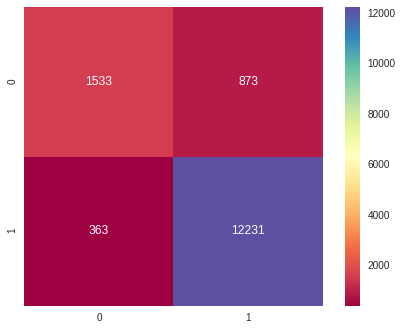

In [ ]:
randomcv(tfidf_train,tfidf_test,Y_train,Y_test)


GRID-SEARCHCV
---

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid(train_feat,test_feat,y_train,y_test):
    parameters = {'C':[10**-4,10**-3,10**-2, 10**0, 10**2,10**-3,10**4],
              'gamma': [10**-4,10**-3,10**-2, 10**0, 10**2,10**-3,10**4]}
    svm = SVC(kernel='rbf')
    svm_rbf= GridSearchCV(svm,param_grid=parameters,n_jobs=-1,scoring='f1',cv=3)
    svm_rbf.fit(train_feat,y_train)
    print('Best Estimator:      ',svm_rbf.best_estimator_)
    print('Optimal parameters:  ',svm_rbf.best_params_)
    print('optimal score:       ',svm_rbf.best_score_*(100))
    print('-------------------------------------------------')
    svm_rbf.best_estimator_.fit(train_feat, y_train)

    y_true, y_pred = y_test,svm_rbf.best_estimator_.predict(test_feat)
    confusion = confusion_matrix(y_true,y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    acc=accuracy_score(y_train,svm_rbf.best_estimator_.predict(train_feat))

    #printing obtained performance metrics
    print('Accuracy on training set is:',acc*100)
    print('Accuracy on test set is:',accuracy*100)
    print("Classification_Report")

    print(classification_report(y_true, y_pred))
    print(precision_recall_fscore_support(y_true, y_pred, average='micro'))
    print('<==========confusion matrix for test data=========>')
    p= sns.heatmap(confusion, annot=True, fmt="d", cmap="Spectral",square=True) 

Best Estimator:       SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'C': 100, 'gamma': 1}
optimal score:        95.4158674584948
-------------------------------------------------
Accuracy on training set is: 100.0
Accuracy on test set is: 92.74
Classification_Report
             precision    recall  f1-score   support

          0       0.86      0.64      0.73      2339
          1       0.94      0.98      0.96     12661

avg / total       0.92      0.93      0.92     15000

(0.9274, 0.9274, 0.9274, None)
<==========confusion matrix for test data=========>
11:27:12.057100


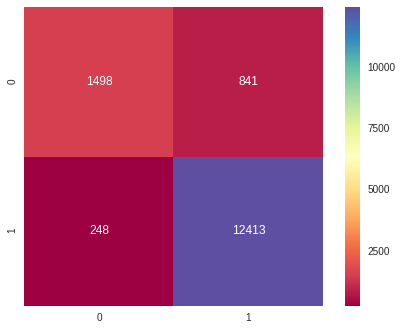

In [ ]:
grid(tfidf_train,tfidf_test,Y_train,Y_test)

BAG OF WORDS
====

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer() 
bow_train = count_vect.fit_transform(X_train)
bow_test = count_vect.transform(X_test)


Best Estimator:       SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'gamma': 0.001, 'C': 100}
optimal score:        95.14935517587976
-------------------------------------------------
Accuracy on training set is: 99.16571428571429
Accuracy on test set is: 92.08666666666666
Classification_Report
             precision    recall  f1-score   support

          0       0.78      0.70      0.74      2406
          1       0.94      0.96      0.95     12594

avg / total       0.92      0.92      0.92     15000

(0.9208666666666666, 0.9208666666666666, 0.9208666666666666, None)
<==========confusion matrix for test data=========>
5:27:27.363820


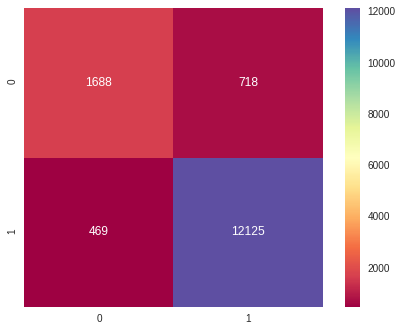

In [ ]:
randomcv(bow_train,bow_test,Y_train,Y_test)

Best Estimator:       SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'C': 100, 'gamma': 0.001}
optimal score:        94.74515246713547
-------------------------------------------------
Accuracy on training set is: 97.77714285714286
Accuracy on test set is: 91.74
Classification_Report
             precision    recall  f1-score   support

          0       0.78      0.67      0.72      2357
          1       0.94      0.96      0.95     12643

avg / total       0.91      0.92      0.91     15000

(0.9174, 0.9174, 0.9174, None)
<==========confusion matrix for test data=========>


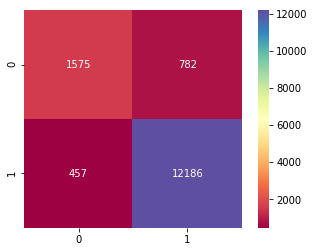

In [ ]:
grid(train_bow,test_bow,Y_train,Y_test)

TRAINING OUR OWN WORD 2 VEC
=====

In [ ]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [ ]:
import gensim
import re
i=0
list_of_train=[]
for sent in X_train:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_train.append(filtered_sentence)


In [ ]:
i =0
list_of_test =[]
for sent in X_test:
    final_Xtest = []
    sent = cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                final_Xtest.append(cleaned_words.lower())
            else:
                continue
    list_of_test.append(final_Xtest)

In [ ]:
from gensim.models import Word2Vec
w2v_train_model=Word2Vec(list_of_train,min_count=3,size=100,workers=5)


In [ ]:
w2v_test_model=Word2Vec(list_of_test,min_count=3,size=100,workers=5)


AVERAGE W2V
---

Best Estimator:       SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'gamma': 1, 'C': 1}
optimal score:        91.54013015057645
-------------------------------------------------
Accuracy on training set is: 84.39999999999999
Accuracy on test set is: 84.15333333333334
Classification_Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2377
          1       0.84      1.00      0.91     12623

avg / total       0.71      0.84      0.77     15000

(0.8415333333333334, 0.8415333333333334, 0.8415333333333334, None)
<==========confusion matrix for test data=========>
0:34:19.734606


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


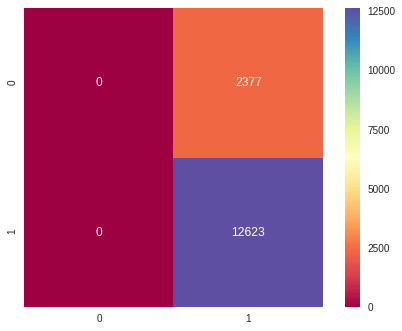

In [ ]:
randomcv(sent_train,sent_test,Y_train,Y_test)

Best Estimator:       SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'C': 0.0001, 'gamma': 0.0001}
optimal score:        91.54013015057645
-------------------------------------------------
Accuracy on training set is: 84.39999999999999
Accuracy on test set is: 84.15333333333334
Classification_Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2377
          1       0.84      1.00      0.91     12623

avg / total       0.71      0.84      0.77     15000

(0.8415333333333334, 0.8415333333333334, 0.8415333333333334, None)
<==========confusion matrix for test data=========>
4:57:56.237830


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


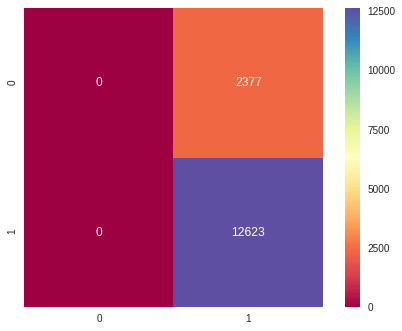

In [ ]:
grid(sent_train,sent_test,Y_train,Y_test)

TFIDF-W2V featurization for  svm
------

In [ ]:
tf_idf_vect = TfidfVectorizer()
w2v_train = tf_idf_vect.fit_transform(X_train)


In [ ]:
tfidf_vect = TfidfVectorizer()
w2v_test = tfidf_vect.fit_transform(X_test)

In [ ]:
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_train_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = w2v_train[row, tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_train.append(sent_vec)
    row += 1

In [ ]:
tfidf_featt = tfidf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_test: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_test_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = w2v_test[row, tfidf_featt.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_test.append(sent_vec)
    row += 1


Best Estimator:       SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'gamma': 0.01, 'C': 100}
optimal score:        93.23950055060955
-------------------------------------------------
Accuracy on training set is: 90.35428571428571
Accuracy on test set is: 83.00666666666666
Classification_Report
             precision    recall  f1-score   support

          0       0.26      0.04      0.08      2360
          1       0.85      0.98      0.91     12640

avg / total       0.75      0.83      0.78     15000

(0.8300666666666666, 0.8300666666666666, 0.8300666666666666, None)
<==========confusion matrix for test data=========>
1:08:30.606334


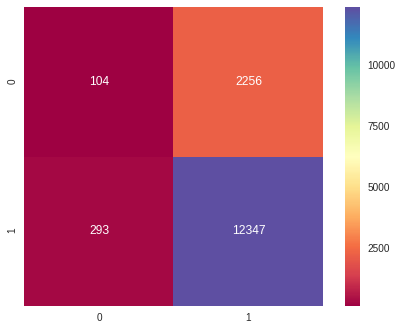

In [ ]:
randomcv(tfidf_sent_train,tfidf_sent_test,Y_train,Y_test)


Best Estimator:       SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Optimal parameters:   {'C': 100, 'gamma': 0.01}
optimal score:        93.23156767259475
-------------------------------------------------
Accuracy on training set is: 90.25142857142858
Accuracy on test set is: 84.30666666666666
Classification_Report
             precision    recall  f1-score   support

          0       0.67      0.00      0.01      2357
          1       0.84      1.00      0.91     12643

avg / total       0.82      0.84      0.77     15000

(0.8430666666666666, 0.8430666666666666, 0.8430666666666666, None)
<==========confusion matrix for test data=========>


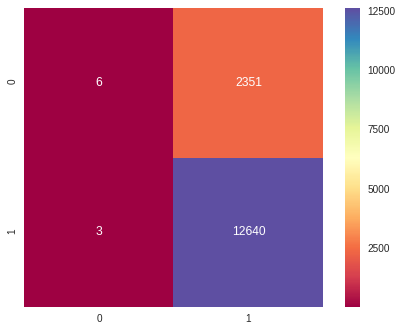

In [ ]:
grid(tfidf_sent_train,tfidf_sent_test,Y_train,Y_test)

In [ ]:
from prettytable import PrettyTable

In [ ]:
x = PrettyTable()
x.field_names = ["Featurization","BOW","TFIDF","AVG_W2V","TFIDF_W2V" ]
x.add_row(["Optimal C using RANDOM SEARCH",100,100,1,100])
x.add_row(["Optimal GAMMA using RANDOM SEARCH",0.001,0.01,1,0.01])
x.add_row(["Train Accuracy",99.16,96.03,84.39,90.35])
x.add_row(["Test Accuracy", 92.08,91.75,84.15,83.00])
x.add_row(["-----------------------------","--------------","--------------","--------------","-------------",])


x.add_row(["Optimal C using Grid search",100,100, 0.0001,100])
x.add_row(["Optimal GAMMA using Grid search",0.001,1,0.0001,0.01])
x.add_row(["Train Accuracy",97.77,100,84.39,90.25])
x.add_row(["Test Accuracy", 91.74,95.41, 84.15,84.30])


In [ ]:

print(x)

+-----------------------------------+----------------+----------------+----------------+---------------+
|           Featurization           |      BOW       |     TFIDF      |    AVG_W2V     |   TFIDF_W2V   |
+-----------------------------------+----------------+----------------+----------------+---------------+
|   Optimal C using RANDOM SEARCH   |      100       |      100       |       1        |      100      |
| Optimal GAMMA using RANDOM SEARCH |     0.001      |      0.01      |       1        |      0.01     |
|           Train Accuracy          |     99.16      |     96.03      |     84.39      |     90.35     |
|           Test Accuracy           |     92.08      |     91.75      |     84.15      |      83.0     |
|   -----------------------------   | -------------- | -------------- | -------------- | ------------- |
|    Optimal C using Grid search    |      100       |      100       |     0.0001     |      100      |
|  Optimal GAMMA using Grid search  |     0.001      | 

BAG OF WORDS AND  FEATURIZATION GAVE OPTIMAL TRAIN AND TEST ACCURACY
--

Lets implement SGD classifier with hinge loss which is equivalent to linearsvm
=========

Accuracy on training set is: 92.78285714285714
Accuracy on test set is: 91.26666666666667
F1_score on test set is: 90.15225787217284
Precision on test set is: 91.20604356335488
Recall on test set is: 91.26666666666667
<=============confusion matrix============>


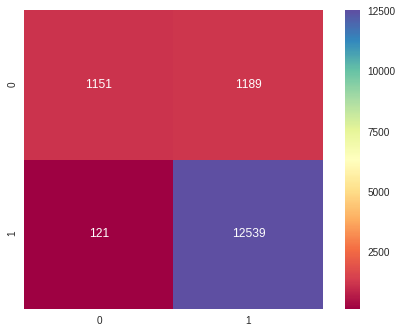

In [ ]:

clf = SGDClassifier(loss="hinge", penalty="l2",max_iter=100)#SGD classifier with hinge loss ehich is equivalent to linear svm
clf.fit(tfidf_train,Y_train)
predict=clf.predict(tfidf_train)#predicting train data using model

pred = clf.predict(tfidf_test)#predicting test data using model
f1score = f1_score(Y_test,pred,average='weighted')#obtaining various performance metrics
precision = precision_score(Y_test,pred,average='weighted')
recall = recall_score(Y_test,pred,average='weighted')
confusion = confusion_matrix(Y_test,pred)
accuracy = accuracy_score(Y_test,pred)
acc=accuracy_score(Y_train,predict)
#printing various performance metrics
print('Accuracy on training set is:',acc*100)
print('Accuracy on test set is:',accuracy*100)
print('F1_score on test set is:',f1score*100)
print('Precision on test set is:',precision*100)
print('Recall on test set is:',recall*100)
print('<=============confusion matrix============>')
P= sns.heatmap(confusion, annot=True,cmap="Spectral", fmt="d",square=True)


In [ ]:
names = tf_idf_vect.get_feature_names()
feat = np.array(names)
features = np.vstack((feat,np.absolute(clf.coef_)))
features= pd.DataFrame(data=features.T,columns=('words','coefficients'))
top_feat= features.sort_values('coefficients',axis=0,inplace=False,ascending=False,kind='quicksort')
print('<=======> Top 10 important words <=======> ')
print(top_feat[0:10])

<=======> Top 10 important words <=======> 
             words           coefficients
34741    unrelated  9.594581085087672e-05
2433    anticipate  8.581682631102269e-05
9746       daytime  8.581682631102269e-05
34338  ultraviolet  8.581682631102269e-05
27618    replanted  8.581682631102269e-05
1850          ahnd  8.581682631102269e-05
33272       threee  8.581682631102269e-05
32651        tanks  8.581682631102269e-05
34681   unoccupied  8.581682631102269e-05
14141        frech  8.581682631102269e-05


RBF kernal svm works well than linear svm
-----


CONCLUSION
----------
1. Using various featurization(BOW,TFIDF,AVGW2V,TFIDFW2V) to get text vectors.
2. Obtaining optimal parameters using hyperparameter tuning using grid search and random
search .
5. Obtaining various performance metrics.
2.  Obtaining train and test accuracy
4. Decide which featurization when modeled gives optimal perforamance.